### Bet Sizing

This notebook will cover exercise answer.

* Exercise 10.1
* Exercise 10.2
* Exercise 10.3
* Exercise 10.4

> In the first sense, probability means the degree of belief or approvability of an opinion—the gut view of probability. Scholars use the term “epistemological” to convey this meaning; epistemological refers to the limits of human knowledge not fully analyzable
>
> &mdash; Peter L. Bernstein, Against the Gods: The Remarkable Story of Risk

The key difference between gambling and investment is how risks are controlled.

In this exercise, we are translating probabilities into bets!

Most of the functions below can be found under:

* Tool/risk_mgmt 
* Sample_data/make_data

If you are keen on generating synthetic data for your research, copy the code snippets [Generate synthetic raw data](https://gist.github.com/boyboi86/5e00faf48f60abfdbe838fbdee269471) in my gist.


Contact: boyboi86@gmail.com

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import norm
import research as rs

%matplotlib inline

Num of CPU core:  4
Machine info:  Windows-10-10.0.18362-SP0
Python 3.7.4 (default, Aug  9 2019, 18:34:13) [MSC v.1915 64 bit (AMD64)]
Numpy 1.18.5
Pandas 1.0.4


C:\Users\Wei_X\Anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


<Figure size 1500x800 with 1 Axes>

In [2]:
n_samples = 10000
min_prob = 1e-3 #by right we should used [-1,0], but to avoid -inf and error msg we use something else
max_prob = 1.

X =  rs.make_randomt1_data(n_samples=n_samples,
                           max_days = 25.,
                           Bdate = False) # True = business days only

X

,t1
1993-01-26 19:30:04.799911,1993-02-07 21:14:24.826009
1993-01-27 19:30:04.799911,1993-02-18 12:05:13.129634
1993-01-28 19:30:04.799911,1993-02-08 10:02:41.499516
1993-01-29 19:30:04.799911,1993-02-21 12:47:20.135076
1993-01-30 19:30:04.799911,1993-02-11 07:33:28.730302
...,...
2020-06-08 19:30:04.799911,2020-06-29 21:08:46.200101
2020-06-09 19:30:04.799911,2020-06-23 23:56:12.170099
2020-06-10 19:30:04.799911,2020-06-18 01:22:34.355227
2020-06-11 19:30:04.799911,2020-07-05 11:35:38.047513


**Note:**

Your below graphs will contain 0 value if your Bdate = True (I offset weekends, so there will be a consistent 3 day breaks).

As a result, the algo detected missing dates (While all trades based on investigation did close before new signal generation, as a result no trades were active cause 0 values, conincidentally all of them were Mondays).

    X1[X1 == 0].index.dayofweek
    
In practice, we will have weekends and data restructuring. As a result, we might end up with 2 - 3 days absent from our dataset. 

During implementation of the below algo, additional measure has to be taken to mitigate the impact from such events (These breaks will be reflected).

Try offset with business days instead of daily frequency, using the above algo (Bdate = True), to see the difference in your graph.

**Note:**

These algo will most likely be used with triple barriers technique, hence able to cross-reference with other quantitative strategies as well.

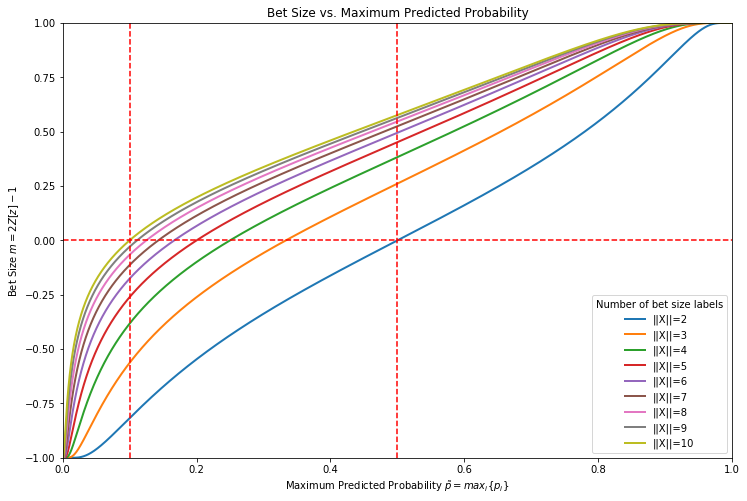

In [3]:
class_labels = np.arange(2,11)
plt.figure(figsize=(12,8))
for cls in class_labels:

    p = np.linspace(start = min_prob, 
                    stop = max_prob,
                    num = n_samples,
                    endpoint = False)
    
    X["prob"] = p
    X["Z_score"] = X["prob"].apply(lambda prob: (prob - 1/cls) / (prob * (1 - prob))**0.5)
    X["bet_size_prob"] = X["Z_score"].apply(lambda x: 2 * norm.cdf(x) - 1)
    plt.plot(X["prob"],X["bet_size_prob"], label=f"||X||={cls}", linewidth=2, alpha=1)
plt.ylim(-1, 1)
plt.xlim(0, 1) #our lowest was only 1e-3, not negative
plt.axhline(y=0, c='r',ls='--')
plt.axvline(x=0.1, c='r',ls='--') # predict prob = 0.1
plt.axvline(x=0.5, c='r',ls='--') # predict prob = 0.5
plt.ylabel("Bet Size $m=2Z[z]-1$")
plt.xlabel(r"Maximum Predicted Probability $\tilde{p}=max_i${$p_i$}")
plt.title("Bet Size vs. Maximum Predicted Probability")
plt.legend(title="Number of bet size labels")
plt.show()

**Note**

Given a range of initial probabilities from 0 to 1.0.

Notice how multi-labels/ multi-classes affects the rate of convergence in the above, based on one-vs-rest method.

The range of maximum predicted probabilities is around 0.1 to 0.5 (Refer to red dotted line).

The larger the classes, the lower prediction probability required to pass hypothesis. (1/k to be exact)

**Note**

In the previous exercises, we usually have binary classes. But for one-vs-rest method, the concept is different.

[ML Mastery: One-vs-Rest](https://machinelearningmastery.com/one-vs-rest-and-one-vs-one-for-multi-class-classification/)

Took me a while to realized the difference.

[1993-01-26 19:30:04.799911   -0.955192
1993-01-27 19:30:04.799911   -0.966361
1993-01-28 19:30:04.799911   -0.848181
1993-01-29 19:30:04.799911   -0.812015
1993-01-30 19:30:04.799911   -0.758141
                                ...   
2002-03-16 19:30:04.799911   -0.217574
2002-03-17 19:30:04.799911   -0.214878
2002-03-18 17:50:59.964076   -0.214654
2002-03-18 19:30:04.799911   -0.214052
2002-03-19 06:19:25.449499   -0.217660
Length: 6667, dtype: float64] this out


[1993-01-26 19:30:04.799911   -0.955192
1993-01-27 19:30:04.799911   -0.966361
1993-01-28 19:30:04.799911   -0.848181
1993-01-29 19:30:04.799911   -0.812015
1993-01-30 19:30:04.799911   -0.758141
                                ...   
2002-03-16 19:30:04.799911   -0.217574
2002-03-17 19:30:04.799911   -0.214878
2002-03-18 17:50:59.964076   -0.214654
2002-03-18 19:30:04.799911   -0.214052
2002-03-19 06:19:25.449499   -0.217660
Length: 6667, dtype: float64, 2011-05-07 08:52:41.148743    0.200702
2011-05-07 19:30:04.799911    0.202629
2011-05-07 21:24:09.552712    0.200612
2011-05-08 16:38:21.065154    0.203762
2011-05-08 19:30:04.799911    0.204600
                                ...   
2020-06-23 23:56:12.170099    0.709519
2020-06-25 12:31:51.591128    0.738419
2020-06-28 11:55:03.678393    0.857311
2020-06-29 21:08:46.200101    0.977558
2020-07-05 11:35:38.047513    0.000000
Length: 6666, dtype: float64] this out
[1993-01-26 19:30:04.799911   -0.955192
1993-01-27 19:30:04.799911   -0.

2020-06-12 19:31:15.246134 100.0% _avg_active_signals done after 1.0 mins. Remaining 0.0 mins.


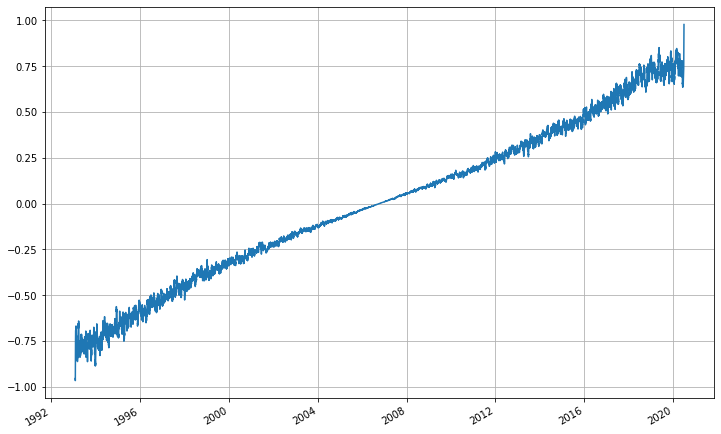

In [4]:
X["Z_score"] = X["prob"].apply(lambda prob: (prob - 1/2) / (prob * (1 - prob))**0.5)
X["bet_size_prob"] = X["Z_score"].apply(lambda x: 2 * norm.cdf(x) - 1)
predict_prob = np.random.uniform(0.5, 1., n_samples) #your ave bet size will hit negative if pred/ prob is below 0.5
X['pred'] = pd.Series(predict_prob, index = X.index)
X['signal'] = X['pred'].mul(X['bet_size_prob'])

sig = rs.avg_active_signals(signals = X, num_threads = 3)

sig[:-1].plot(figsize=(12,8), grid=True) #plot graph

**Note**

Based on the probabilities from 1e-3 to 1. (That is why started from negative 0.75)

The above graph demostrates average bet sizing. In practice, it would look more like a stationary series. Since, it's quite difficult to have an ascending probabilties from 1e-3 to 1.

**Note**

During implementation for this algo, try to revert to pandas "apply". Some of the syntax, does not behave as expected.

[1993-01-26 19:30:04.799911    0.928649
1993-01-27 19:30:04.799911    0.952467
1993-01-28 19:30:04.799911    0.671990
1993-01-29 19:30:04.799911    0.564517
1993-01-30 19:30:04.799911    0.459018
                                ...   
2002-03-16 19:30:04.799911    0.460573
2002-03-17 19:30:04.799911    0.438556
2002-03-18 17:50:59.964076    0.440656
2002-03-18 19:30:04.799911    0.432248
2002-03-19 06:19:25.449499    0.459297
Length: 6667, dtype: float64] this out


[1993-01-26 19:30:04.799911    0.928649
1993-01-27 19:30:04.799911    0.952467
1993-01-28 19:30:04.799911    0.671990
1993-01-29 19:30:04.799911    0.564517
1993-01-30 19:30:04.799911    0.459018
                                ...   
2002-03-16 19:30:04.799911    0.460573
2002-03-17 19:30:04.799911    0.438556
2002-03-18 17:50:59.964076    0.440656
2002-03-18 19:30:04.799911    0.432248
2002-03-19 06:19:25.449499    0.459297
Length: 6667, dtype: float64, 2002-03-19 11:03:19.034973    0.485590
2002-03-19 19:30:04.799911    0.486599
2002-03-19 23:41:47.975258    0.488126
2002-03-20 19:30:04.799911    0.481142
2002-03-21 19:30:04.799911    0.497052
                                ...   
2011-05-04 19:23:17.230682    0.350059
2011-05-04 19:30:04.799911    0.332676
2011-05-05 19:30:04.799911    0.366901
2011-05-06 19:30:04.799911    0.348328
2011-05-07 06:50:13.860817    0.339544
Length: 6667, dtype: float64] this out


[1993-01-26 19:30:04.799911    0.928649
1993-01-27 19:30:04.799911    0.952467
1993-01-28 19:30:04.799911    0.671990
1993-01-29 19:30:04.799911    0.564517
1993-01-30 19:30:04.799911    0.459018
                                ...   
2002-03-16 19:30:04.799911    0.460573
2002-03-17 19:30:04.799911    0.438556
2002-03-18 17:50:59.964076    0.440656
2002-03-18 19:30:04.799911    0.432248
2002-03-19 06:19:25.449499    0.459297
Length: 6667, dtype: float64, 2002-03-19 11:03:19.034973    0.485590
2002-03-19 19:30:04.799911    0.486599
2002-03-19 23:41:47.975258    0.488126
2002-03-20 19:30:04.799911    0.481142
2002-03-21 19:30:04.799911    0.497052
                                ...   
2011-05-04 19:23:17.230682    0.350059
2011-05-04 19:30:04.799911    0.332676
2011-05-05 19:30:04.799911    0.366901
2011-05-06 19:30:04.799911    0.348328
2011-05-07 06:50:13.860817    0.339544
Length: 6667, dtype: float64, 2011-05-07 08:52:41.148743    0.349693
2011-05-07 19:30:04.799911    0.360295
201

2020-06-12 19:32:16.685547 100.0% _avg_active_signals done after 0.98 mins. Remaining 0.0 mins.


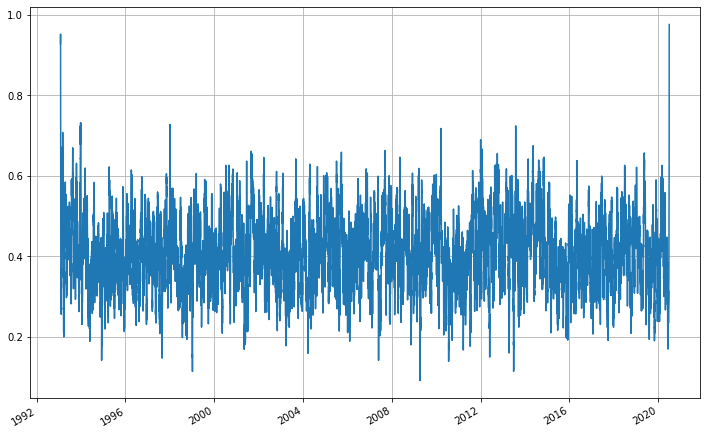

In [5]:
sig = rs.get_signal(events= X,
               step_size = 1,
               prob = X['pred'], #now we apply random uniform 0.5 - 1
               pred=X['pred'], #now we apply random uniform 0.5 - 1.
               n_classes = 2.,
               discretization = False,
               num_threads = 3)

sig[:-1].plot(figsize=(12,8), grid=True)

**Note**

The above graph demostrates average bet sizing. As mentioned earlier on, it should look like a stationary series as long as the initial probability is >= 1/k.

The average bet size will be part of your executed nominal amount based on triple barrier algo.

Another assumption for the above "stationary graph" all long no short. Which we will change later.

[1993-01-26 19:30:04.799911   -0.928649
1993-01-27 19:30:04.799911   -0.952467
1993-01-28 19:30:04.799911   -0.597967
1993-01-29 19:30:04.799911   -0.509000
1993-01-30 19:30:04.799911   -0.414604
                                ...   
2002-03-16 19:30:04.799911   -0.244171
2002-03-17 19:30:04.799911   -0.240188
2002-03-18 17:50:59.964076   -0.299791
2002-03-18 19:30:04.799911   -0.246495
2002-03-19 06:19:25.449499   -0.281150
Length: 6667, dtype: float64] this out
[1993-01-26 19:30:04.799911   -0.928649
1993-01-27 19:30:04.799911   -0.952467
1993-01-28 19:30:04.799911   -0.597967
1993-01-29 19:30:04.799911   -0.509000
1993-01-30 19:30:04.799911   -0.414604
                                ...   
2002-03-16 19:30:04.799911   -0.244171
2002-03-17 19:30:04.799911   -0.240188
2002-03-18 17:50:59.964076   -0.299791
2002-03-18 19:30:04.799911   -0.246495
2002-03-19 06:19:25.449499   -0.281150
Length: 6667, dtype: float64, 2011-05-07 08:52:41.148743   -0.155691
2011-05-07 19:30:04.799911   -0.

[1993-01-26 19:30:04.799911   -0.928649
1993-01-27 19:30:04.799911   -0.952467
1993-01-28 19:30:04.799911   -0.597967
1993-01-29 19:30:04.799911   -0.509000
1993-01-30 19:30:04.799911   -0.414604
                                ...   
2002-03-16 19:30:04.799911   -0.244171
2002-03-17 19:30:04.799911   -0.240188
2002-03-18 17:50:59.964076   -0.299791
2002-03-18 19:30:04.799911   -0.246495
2002-03-19 06:19:25.449499   -0.281150
Length: 6667, dtype: float64, 2011-05-07 08:52:41.148743   -0.155691
2011-05-07 19:30:04.799911   -0.178418
2011-05-07 21:24:09.552712   -0.152589
2011-05-08 16:38:21.065154   -0.168079
2011-05-08 19:30:04.799911   -0.182403
                                ...   
2020-06-23 23:56:12.170099    0.288313
2020-06-25 12:31:51.591128    0.425948
2020-06-28 11:55:03.678393    0.639175
2020-06-29 21:08:46.200101    0.976323
2020-07-05 11:35:38.047513    0.000000
Length: 6666, dtype: float64, 2002-03-19 11:03:19.034973   -0.289628
2002-03-19 19:30:04.799911   -0.308452
200

2020-06-12 19:33:18.291069 100.0% _avg_active_signals done after 0.99 mins. Remaining 0.0 mins.


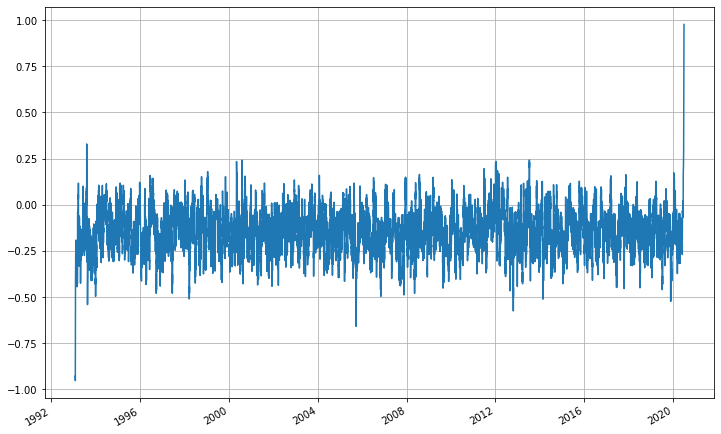

In [6]:
X['side'] = pd.Series(1., index = X.index)
X['side'] = [1 if x%3 == 0 else -1 for x in X['side'].cumsum()] #cheat code for trying to mimic real datasets
sig1 = rs.get_signal(events= X,
               step_size = 1,
               prob = X['pred'], #now we apply random uniform 0.5 - 1
               pred=X['pred'], #now we apply random uniform 0.5 - 1.
               n_classes = 2.,
               discretization = False,
               num_threads = 3)

sig1[:-1].plot(figsize=(12,8), grid=True)

**Note**

We synthetically create "sides" based on the below function, which resulted in 66% of shorting position while the rest will be long. As seen above, most of the average bets are below 0.

    X['side'] = [1 if x%3 == 0 else -1 for x in X['side'].cumsum()]

You will need to have both long and short positions to fit 2 gaussians distributions later.

**Note**

If you do mean-reversion with long/ short style, it will be something like the above.

Notice that average bet size can go below 0? I can almost guarantee the above series most likely can pass ADF.

2020-06-12 19:33:55.349092 _co_position done after 0.60 mins


max ln events: 8, max sh events: 16


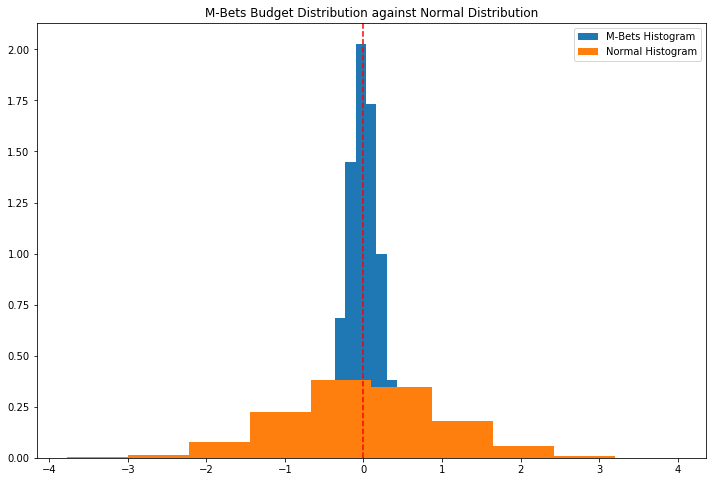

In [7]:
df0 = rs.co_bets_size(events = X,
                      side = X['side'],
                      budget = True,
                      num_threads = 1)

random_x = np.random.normal(0, 1, 10000)
fig, ax = plt.subplots(figsize=(12,8))
ax.hist(df0.m, density=True, label = 'M-Bets Histogram')
ax.hist(random_x, density=True, label = 'Normal Histogram')
plt.axvline(x=0., c='r',ls='--')
plt.title("M-Bets Budget Distribution against Normal Distribution")
plt.legend()
plt.show()

**Note**

The above Density histogram (Similar to KDE) were plotted using budget method.

Based on the initial long short ratio. m bet seems to be more negative, as compared to normal distribution.

Displayed vastly different kurtosis and skewness. 

Looks like extreme T-distribution (Tall and Narrow), seems very bias to me.

**Note**

The below density histogram is obviously less bias but demostrates high variance (Accuracy). 

Looks like Negative Extreme Small Values Distribution (ESV/ Fat-tail distribution), seems inaccurate to me.

However the below density histogram is only sum of all concurrent positions. 

We will need to fit a [mixture](http://wiki.analytica.com/Mixture_distribution) 2 guassians using EF3M algorithm on the below.

2020-06-12 19:34:32.918664 _co_position done after 0.62 mins


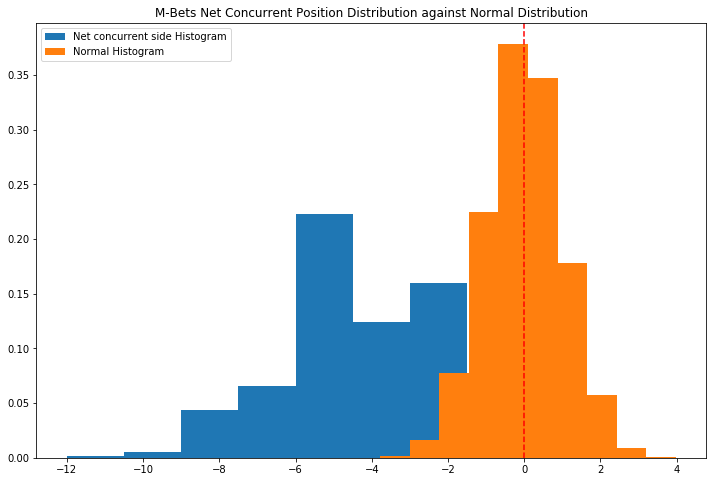

In [8]:
# Exercise 10.4
df1 = rs.co_bets_size(events = X,
                      side = X['side'],
                      budget = False,
                      num_threads = 1)

fig, ax = plt.subplots(figsize=(12,8))
ax.hist(df1.c_t, density=True, label = 'Net concurrent side Histogram')
ax.hist(random_x, density=True, label = 'Normal Histogram')
plt.axvline(x=0., c='r',ls='--')
plt.title("M-Bets Net Concurrent Position Distribution against Normal Distribution")
plt.legend()
plt.show()

**Before you begin the EF3M algorithm implementation:**
 
Please finish their [research paper (Macros and Foreman [2014])](https://papers.ssrn.com/sol3/papers.cfm?abstract_id=1931734).

Some reference for you after you completed reading their research paper.
 
1. Moments are what describe the distribution [3 Moments wiki](https://en.wikipedia.org/wiki/Moment_(mathematics))
2. You need to have both long and short positions to continue
3. We are running a Monte-Carlos simulation, be prepared to use multiprocessing (parallelization)
4. Raw moments are from origin, central moments are from mean

In [9]:
r_mts = [np.mean(df1.c_t ** r) for r in np.arange(1,6)] # moments ard origin

epsilon=1e-2
factor=5 # this is the ‘lambda’ referred in the paper
variant = 1

d1 = rs.mts_fit(mts = r_mts, epsilon = epsilon, factor = 5, variant = 0, n_run = 10, f_params = True, num_threads = 1)

C:\Users\Wei_X\Desktop\Python\research\Risk_mgmt\ef3m.py:67: RuntimeWarning: invalid value encountered in double_scalars
  sig_1 = ((mts[1] - sig_2**2 - mu2**2) / p1 + sig_2**2 + mu2**2 - mu1**2)**(.5)
C:\Users\Wei_X\Desktop\Python\research\Risk_mgmt\ef3m.py:65: RuntimeWarning: invalid value encountered in double_scalars
  sig_2 = ((mts[2]+2*p1*mu1**3+(p1 - 1)*mu2**3-3*mu1*(mts[1]+mu2**2*(p1-1)))/(3*(1-p1)*(mu2-mu1)))**(.5)
2020-06-12 19:34:36.943657 _mts_loop done after 0.06 mins


In [10]:
# hints!

def get_param(param: pd.DataFrame):
    _p1, _mu1, _mu2  = param.p1.mean(), param.mu1.mean(), param.mu2.mean()
    _std_1, _std_2 = param.std_1.mean(), param.std_2.mean()
    return np.array([_mu1, _mu2, _std_1, _std_2, _p1])

def m_dist(data: float, param: list):

    _mu1, _mu2, _std_1, _std_2, _p1  = param
    _cdf = _p1 * norm.cdf(data, _mu1, _std_1) + (1 - _p1) * norm.cdf(data, _mu2, _std_2)
    return _cdf

def m_bet_EF3M(data: pd.DataFrame, param: pd.DataFrame):
    m_series = []
    m_param = get_param(param = param)
    m_dist0 = m_dist(data = 0, param = m_param)

    for idx in np.arange(data.shape[0]):
        if data.c_t[idx] >= .0:
            _cdf = (m_dist(data = data.c_t[idx], param = m_param) - m_dist0)/ (1 - m_dist0)
        else:
            _cdf = (m_dist(data = data.c_t[idx], param = m_param) - m_dist0)/ m_dist0
        m_series.append(_cdf)
    data['m'] = m_series
    return data

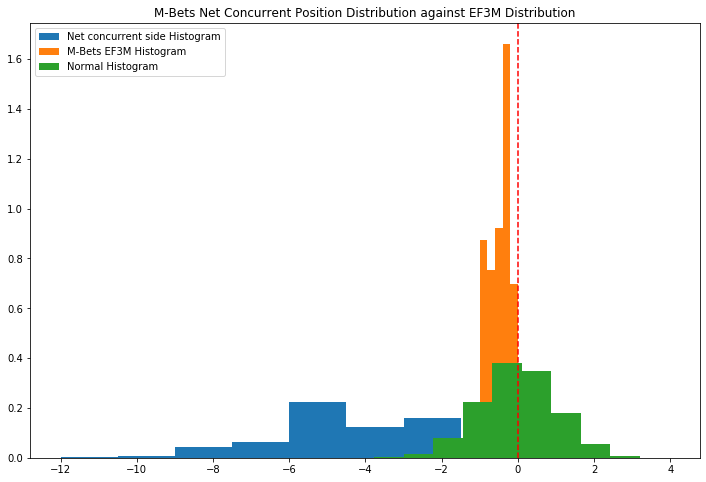

In [11]:
# Not using the above

df1 = rs.m_bet_EF3M(data = df1, param = d1)
fig, ax = plt.subplots(figsize=(12,8))
ax.hist(df1.c_t, density=True, label = 'Net concurrent side Histogram')
ax.hist(df1.m, density=True, label = 'M-Bets EF3M Histogram')
ax.hist(random_x, density=True, label = 'Normal Histogram')
plt.axvline(x=0., c='r',ls='--')
plt.title("M-Bets Net Concurrent Position Distribution against EF3M Distribution")
plt.legend()
plt.show()

**Note**

After applying EF3M algo for bet-sizing, the bet size also looks bias as well

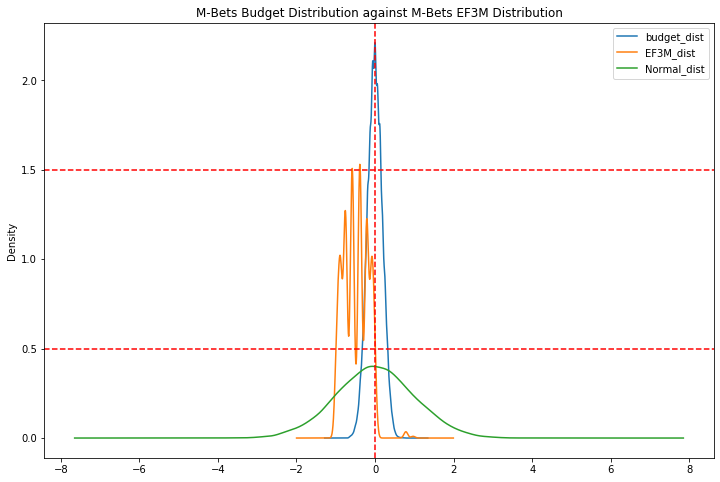

In [12]:
com_df = pd.DataFrame({'budget_dist': df0.m, 'EF3M_dist': df1.m, 'Normal_dist': random_x})
com_df.plot.kde(figsize = (12,8))
plt.axhline(y=1.5, c = 'r', ls = '--')
plt.axhline(y=0.5, c = 'r', ls = '--')
plt.axvline(x=0., c='r',ls='--')
plt.title("M-Bets Budget Distribution against M-Bets EF3M Distribution")
plt.legend()
plt.show()

### Based on the distribution graphs

Both distribution for EF3M and Budget algorithm, are far from normal distribution.

**Using Budget algorithm, tends to centralize around mean.**

If you noticed in the budget method is centralized around the 2 max frequency of their respective concurrent bet side.

This I believe that was the root of their bias, as a result budget method hardly bet beyond 0.5 for long strategy (Constraint).

**Using EF3M algorithm, tends to give a less bias bet-size.**

In part, due to the fact that we have 66% of short bets. This will affect the skewness of our distribution.

Apart from which, the algorithm also recognize we have 2 different strategy in place (Long/ short). 

Using a mixture gaussian distribution, it could provide a more specific bet and catered to both types. 

As a result it has a broader variance range.

#### Conclusion

Using EF3M algorithm especially deploying long/short strategies concurrenctly is a better choice. The algorithm allows a larger bets size range (Variance), without frequently betting "consistently" (almost equal bet size).

If a strategy is constantly betting equally with strong bias, it will may lead to ruin very quickly. 

The EF3M caveat: 
* Requires alot of sample data
* Expensive computational power required (Monte-Carlos simulation)
    1. Epilson should be 1e-5
    2. n_run should be around 100 - 10,000
* The above is not unimodal (Could be due to lack of data)
* EF3M algorithm is not easy to implement (Mathematics is not easy to understand)
* Would probably be best if both long short signals are balanced

**Note**

Most likely the above will not be updated since I combined all the parts together into a single function.

If imbalance classes may result in non-unimodal distribution, you might want to reconsider using it when deploying a single side trend strategy (SVC).

**Steps**

I may not be correct but I provided the below for your reference to assist you to implement EF3M algorithm:

1. Make sure you convert all the EF3M algorithm into workable class-based codes
2. Run 5th Moment iterator to see if it works (Ignore the nans in get_moments, it's correct)
3. Create Monte-Carlos (Multiple loops)
4. After net concurrent, try to find first 5 raw moments based on net concurrent (Origin = 0)

        raw_mts = [np.mean(out.c_t ** r) for r in np.arange(1,6)]
    
5. Run 5th Moment iterator
6. Find the mean for all parameters including errors (May try filter outliers based on average error)
7. Use the mean parameters to recreate using norm.cdf(), where x = net concurrent value i.e -1, 2
8. Check if your compared result is less bias and somewhat very "seperated" (The algo will create 2 gauss distribution)

**Hints**

* F[0] in the book means x = 0, so you can just create that variable instead of putting it part of your algorithm
* Dr Marco is a good teacher, if you still haven't read his research paper. Do it quickly.
